# CS 171 / EE 142 Problem Set 4
# Due Friday, March 16, 2024 @ 11:59pm 

## Read *all* cells carefully and answer all parts (both text and code)

### Enter your information below:

<div style="color: #000000;background-color: #EEEEFF">
    Your Name (submitter): Shivam <br>
Your student ID (submitter): X717670
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>

<div class="alert alert-success">
    <font size=+2>Total Problem Set Grading</font> (to be completed by grader)<br>
    Total Points: /20<br>
    Late Days Used on this Assignment: <br>
    Total Late Days Used: <br>
</div>

<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 1:</font> <font size=+1>(12 points)</font>
    
In this question, you will write code to do association rule learning, as described in class.

The items will be represented by numbers (for ease and speed) with a separate
list of the names for each item.  `loaddata` (below) loads in a dataset and returns these three things: a list of the names of each item, a list of the examples, and the total number of items.  Each example is a set of numbers representing the items.  For example, for the toy problem in lecture, loaddata returns

`['Jurassic Park', 'Star Wars', 'Forrest Gump', 'Home Alone', 'Toy Story']`

`[[1, 2, 4], [1, 4], [1, 3, 4], [0, 1], [0, 3], [1, 3, 4], [0, 2, 3], [3], [1, 3, 4], [1]]`

`5`

You should use `set`s and `frozenset`s (core python data structures) in your code.  You can read more about them at https://docs.python.org/3/library/stdtypes.html#set

Write the functions `learnrules` and `writerules`, plus any additional helper functions you need.  Use the apriori algorithm to generate "frequent item lists" and the algorithm from class to find rules that meet the minimum support and confidence given.
</div>
</div>
   <div class="alert alert-success">
    <font size=+1>Grading</font> (to be completed by grader)<br>
    Score: /12<br>
</div>

In [2]:
from itertools import combinations, chain #do not import anything else 
# (you may or may not use combinations and chain -- up to you --
#  see https://docs.python.org/3/library/itertools.html?highlight=combinations#itertools.combinations
#  and https://docs.python.org/3/library/itertools.html?highlight=chain#itertools.chain)

# prints out a set, nicely
# names is an optional list of the names for each of the (integer) items
def settostr(s,names=None):
    if names is None:
        elems = [str(e) for e in s]
    else:
        elems = [names[e] for e in s]
    return "{" + (", ".join(elems)) + "}"

In [3]:
# loads in data from filename, assuming the file format used for this assignment
def loaddata(filename):
    with open(filename) as f:
        nitems = int(f.readline())
        names = [f.readline().strip() for i in range(nitems)]
        nrows = int(f.readline())
        data = [[int(s) for s in f.readline().split()] for i in range(nrows)]
        f.close()
        return (names,data,nitems)        

In [4]:
def counter(lst, target):
    count = 0
    for item in lst:
        if all(elem in item for elem in target):
            count += 1
    return count    
 
def learnrules(numitems, data, minsupport, minconfidence):
    comb = []
    for r in range(1, numitems + 1):
        comb.extend(combinations(range(numitems), r))

    m = len(data)
    rules = []
    for x in comb:
        xscore = counter(data, x)
        if xscore / m >= minsupport:
            for y in comb:
                if all(item not in y for item in x):
                    union_xy = list(set(x + y))
                    Uscore = counter(data, union_xy)
                    if Uscore / m >= minsupport:
                        xconfidence = Uscore / xscore
                        if xconfidence >= minconfidence:
                            rules.append([x, y])

    return rules

In [5]:
def writerules(rules, data, itemnames):
    rule_metrics = []
    m = len(data)
    
    for rule in rules:
        antecedent, consequent = rule
        antecedent_support = counter(data, antecedent) / m
        union_support = counter(data, antecedent + consequent) / m
        confidence = union_support / antecedent_support
        rule_metrics.append((antecedent_support, confidence, rule))

    sorted_rules = sorted(rule_metrics, key=lambda x: x[1], reverse=True)

    for antecedent_support, confidence, rule in sorted_rules:
        print("{:7.4f}".format(antecedent_support), "{:7.4f}".format(confidence), settostr(rule[0], itemnames), "->", settostr(rule[1], itemnames))


In [6]:
(itemnames,data,numitems) = loaddata('/usr/local/cs171/toymovies.txt')
itemnames,data

(['Jurassic Park', 'Star Wars', 'Forrest Gump', 'Home Alone', 'Toy Story'],
 [[1, 2, 4],
  [1, 4],
  [1, 3, 4],
  [0, 1],
  [0, 3],
  [1, 3, 4],
  [0, 2, 3],
  [3],
  [1, 3, 4],
  [1]])

In [7]:
# prints the rule set
def printruleset(datasetfilename,minsupport,minconfidence):
    (itemnames,data,numitems) = loaddata(datasetfilename)
    rules = learnrules(numitems,data,minsupport,minconfidence)
    writerules(rules,data,itemnames)

In [8]:
## toy dataset example
printruleset('/usr/local/cs171/toymovies.txt',0.3,0.5)
''' output should look like (lines with the same support and confidence may be listed in any order)
 0.5000  1.0000    {Toy Story} => {Star Wars}
 0.3000  1.0000    {Star Wars, Home Alone} => {Toy Story}
 0.3000  1.0000    {Home Alone, Toy Story} => {Star Wars}
 0.5000  0.7143    {Star Wars} => {Toy Story}
 0.3000  0.6000    {Star Wars, Toy Story} => {Home Alone}
 0.3000  0.6000    {Toy Story} => {Home Alone}
 0.3000  0.6000    {Toy Story} => {Star Wars, Home Alone}
 0.3000  0.5000    {Home Alone} => {Toy Story}
 0.3000  0.5000    {Home Alone} => {Star Wars, Toy Story}
 0.3000  0.5000    {Home Alone} => {Star Wars}
''';

 0.5000  1.0000 {Toy Story} -> {Star Wars}
 0.3000  1.0000 {Star Wars, Home Alone} -> {Toy Story}
 0.3000  1.0000 {Home Alone, Toy Story} -> {Star Wars}
 0.7000  0.7143 {Star Wars} -> {Toy Story}
 0.5000  0.6000 {Toy Story} -> {Home Alone}
 0.5000  0.6000 {Toy Story} -> {Star Wars, Home Alone}
 0.5000  0.6000 {Star Wars, Toy Story} -> {Home Alone}
 0.6000  0.5000 {Home Alone} -> {Star Wars}
 0.6000  0.5000 {Home Alone} -> {Toy Story}
 0.6000  0.5000 {Home Alone} -> {Star Wars, Toy Story}


In [ ]:
%%time
# the full groceries answer (should take under a minute to run)
printruleset('/usr/local/cs171/groceries.txt',0.01,0.5)

In [ ]:
%%time
# a different groceries dataset, looking for rules with less support, but higher confidence (should take under a minute to run)
printruleset('/usr/local/cs171/groceries2.txt',0.001,0.7)

<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 2:</font> <font size=+1>(4 points)</font>

The code below plots the dendrograms for a set of points, for both single and complete linkage.

Below that are four cells that each use this code to plot the dendrograms for (different) sets of points.  For each part, what the dendrogram is supposed to look like is provided.  Your task is to change the input points so that the output matches the supplied image.  Your points may be of any dimensionality, so long as they provide the correct dendrograms.

You just need to change the first line of each code cell to change the definitions for `X2a`, `X2b`, `X2c`, and `X2d`.  The values provided are certainly wrong!
</div>
</div>
   <div class="alert alert-success">
    <font size=+1>Grading</font> (to be completed by grader)<br>
    Score: /4<br>
</div>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial import distance

def plotdendrograms(X,ctypes=['single','complete'],plotpts=False,axs=None):
    initi = 1 if plotpts else 0
    if axs is None:
        _, axs = plt.subplots(1,len(ctypes)+initi,figsize=(4*(initi+len(ctypes)),4))
    if plotpts:
        axs[0].plot(X[:,0],X[:,1],'k.')
    for i,ctype in enumerate(ctypes):
        Z = hierarchy.linkage(distance.pdist(X),ctype)
        hh = hierarchy.dendrogram(Z,ax=axs[i+initi],link_color_func=lambda k: 'b',distance_sort='descending')
        axs[i+initi].set_title(ctype+' linkage')

<div style="color: #000000;background-color: #FFEEAA">
    <font size=+1>Question 2a:</font> <font size=+1>(1 point)</font>
    The dendrogram below should look like
    <br>
    <img src="dendro2a.png" width=400>
</div>

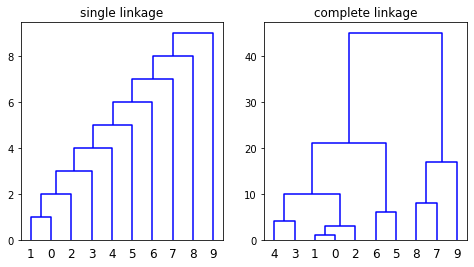

In [116]:
# replace the line below
X2a = np.array([[0],[1],[3],[6],[10],[15],[21],[28],[36],[45]])
plotdendrograms(X2a)

<div style="color: #000000;background-color: #FFEEAA">
    <font size=+1>Question 2b:</font> <font size=+1>(1 point)</font>
    The dendrogram below should look like
    <br>
    <img src="dendro2b.png" width=401>
</div>

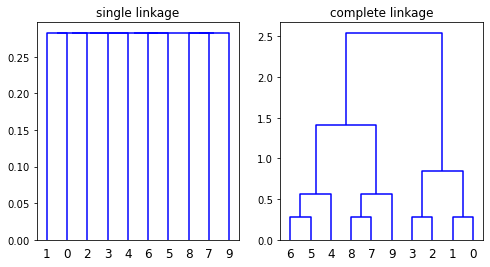

In [120]:
# Replace the line below
X2b = np.array([[0.1,0.2],[0.3,0.4],[0.5,0.6],[0.7,0.8],[0.9,1.0],[1.1,1.2],[1.3,1.4],[1.5,1.6],[1.7,1.8],[1.9,2.0]])
plotdendrograms(X2b)

<div style="color: #000000;background-color: #FFEEAA">
    <font size=+1>Question 2c:</font> <font size=+1>(1 point)</font>
    The dendrogram below should look like
    <br>
    <img src="dendro2c.png" width=401>
</div>

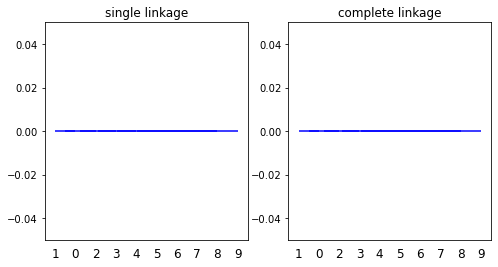

In [183]:
X2c = np.zeros((10,5))
plotdendrograms(X2c)

<div style="color: #000000;background-color: #FFEEAA">
    <font size=+1>Question 2d:</font> <font size=+1>(1 point)</font>
    The dendrogram below should look like
    <br>
    <img src="dendro2d.png" width=401>
</div>

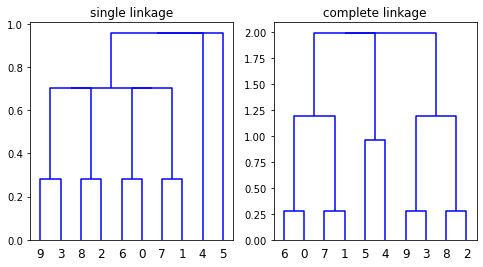

In [25]:
X2d = np.array([[np.sin(i),np.cos(i)] for i in range(10)])
plotdendrograms(X2d)

<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 3:</font> <font size=+1>(4 points)</font>

The code loads the 7-vs-9 digit recognition dataset from the last problem set.  It also has the code to do logistic regression (again, same as the last data set).

Plot the error of logistic regression on the validation set as a function of the number of principal components, from 1 to 100 (step of 1).
</div>
   <div class="alert alert-success">
    <font size=+1>Grading</font> (to be completed by grader)<br>
    Score: /4<br>
</div>

In [194]:
# this code all the same as in PS 3
import h5py 
import numpy as np
import h5py 
import matplotlib.pyplot as plt
import time
from IPython import display
def loaddigitdata(c1,c2,m):
    f = h5py.File('/usr/local/cs171/uspsall73.mat','r') 
    data = f.get('data') 
    data = np.array(data).astype(float)
    X = np.concatenate((data[c1,:,:],data[c2,:,:]))
    Y = np.concatenate((-np.ones((data.shape[1])),np.ones((data.shape[1]))))
    
    rs = np.random.RandomState(seed=132857) # setting seed so that dataset is consistent
    p = rs.permutation(X.shape[0])
    X = X[p] # this and next line make copies, but that's okay given how small our dataset is
    Y = Y[p]
    
    trainX = X[0:m,:] # use the first m (after shuffling) for training
    trainY = Y[0:m,np.newaxis]
    validX = X[m:,:] # use the rest for validation
    validY = Y[m:,np.newaxis]
    return (trainX,trainY,validX,validY)

# load the data, to differentiate between 7s and 9s
# we will use on 500 examples for training (to simulate a low-data situation) and the other part for hold-out validation
(trainX,trainY,validX,validY) = loaddigitdata(6,8,500)
# no z-score normalization this time

def addones(Z):
    return np.hstack((np.ones((Z.shape[0],1)),Z))
    
def learnlogreg_sklearn(X,Y,regstr=0.0,penalizeb=False):
    X = addones(X)
    Y = Y[:,0]
    from sklearn.linear_model import LogisticRegression as lr
    if regstr==0.0:
        pen = 'none'
        C = np.inf
    else:
        pen = 'l2'
        C = 2.0/regstr # ???

    Y = (Y>0.5).astype(int)
    if penalizeb:
        lrres = lr(tol=1e-4,max_iter=100000,penalty=pen,C=C,
                   fit_intercept=False,
                   solver='newton-cg',multi_class='multinomial').fit(X,Y)
        w = lrres.coef_[0,:]
    else:
        lrres = lr(tol=1e-4,max_iter=100000,penalty=pen,C=C,
                   fit_intercept=True,
                   solver='newton-cg',multi_class='multinomial').fit(X[:,1:],Y)
        w = np.hstack((lrres.intercept_,lrres.coef_[0,:]))
    return w

def predictlogreg(X,w):
    return addones(X)@w

def validerr(Xtrain,Ytrain,Xvalid,Yvalid):
    w = learnlogreg_sklearn(Xtrain,Ytrain,1e-6)
    predY = predictlogreg(Xvalid,w)[:,np.newaxis]
    return (np.sign(predY)!=Yvalid).mean()    

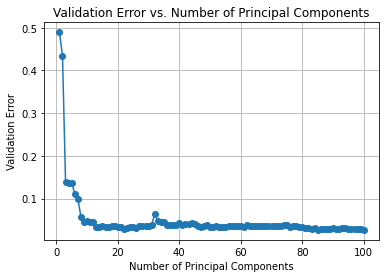

In [195]:
def perform_pca(trainX, validX, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(trainX)
    trainX_pca = pca.transform(trainX)
    validX_pca = pca.transform(validX)
    return trainX_pca, validX_pca

def compute_validation_error(trainX, trainY, validX, validY, n_components):
    trainX_pca, validX_pca = perform_pca(trainX, validX, n_components)
    error = validerr(trainX_pca, trainY, validX_pca, validY)
    return error

n_components_range = range(1, 101)
validation_errors = []
for n_components in n_components_range:
    error = compute_validation_error(trainX, trainY, validX, validY, n_components)
    validation_errors.append(error)
plt.plot(n_components_range, validation_errors, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Validation Error')
plt.title('Validation Error vs. Number of Principal Components')
plt.grid(True)
plt.show()